<a href="https://colab.research.google.com/github/pachterlab/GFCP_2021/blob/main/notebooks/occup_meas_sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import time
t1 = time.time()

# Dependencies and functions


In [15]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 13})

In [16]:
%%capture
!pip install --upgrade git+https://github.com/meichenfang/velocyto.py.git

In [17]:
%%capture
!pip install scanpy
!pip install umap-learn

In [18]:
from vis import *

# Simulation

Generate simulation data.

In [19]:
!mkdir -p data

In [20]:
nCells,nGenes,T,tau,topo =  2000,100,10,[0,3,7],"aba"
name="data/simdata_aba"
meta = nCells,nGenes,T,tau,topo
simdata = simulate_occup_meas(nCells,nGenes,T,tau,topo,seed=42)
sim_export(simdata,meta,name)

## Fig 10: The RNA velocity count processing and inference workflow, applied to data generated by stochastic simulation

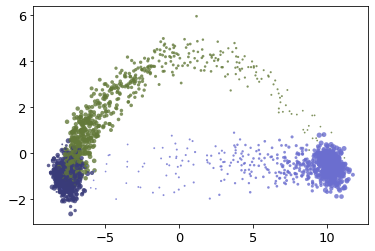

In [21]:
vlm = vcy.VelocytoLoom(loom_filepath=name+".loom")
preprocess(vlm,sim=True,meta=meta,filter=False,sz_normalize=False)
fig,ax=plt.subplots(1,1,figsize=(6,4))
plotEmbed(ax,vlm,"pcs",sim=True)

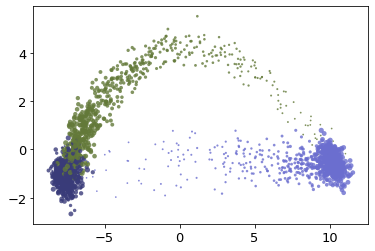

In [22]:
vlm = vcy.VelocytoLoom(loom_filepath=name+".loom")
preprocess(vlm,sim=True,meta=meta,filter=False,sz_normalize=True)
fig,ax=plt.subplots(1,1,figsize=(6,4))
plotEmbed(ax,vlm,"pcs",sim=True)

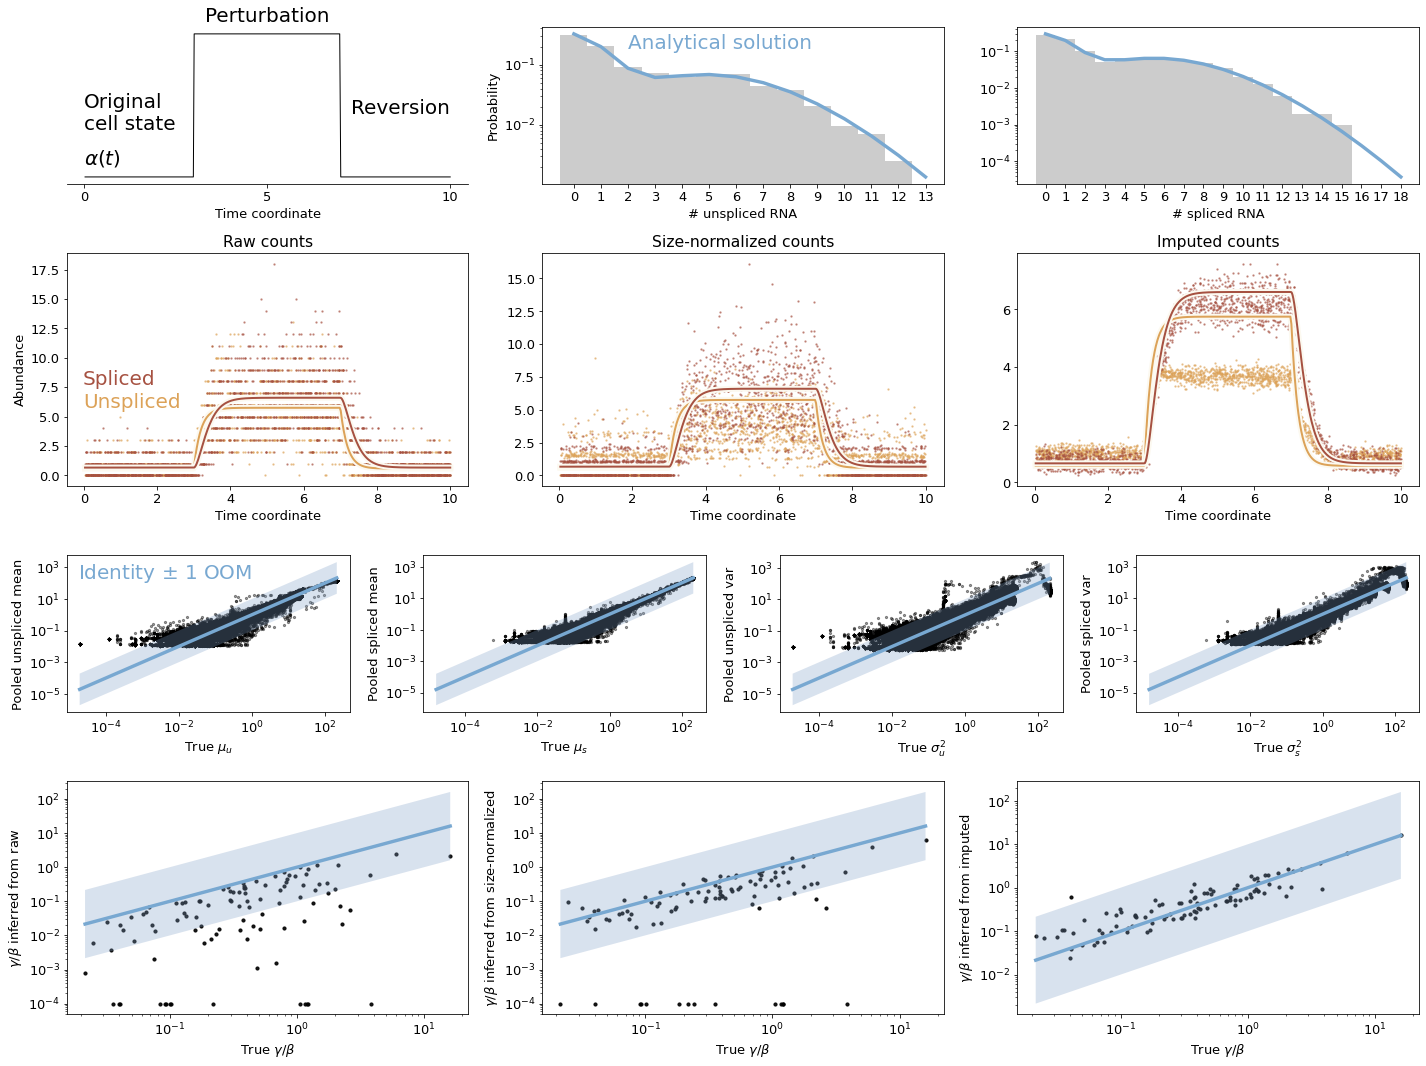

In [23]:
fig=simValidPlots(vlm,tau,meta,geneind=2)
fig.tight_layout()

In [24]:
!mkdir -p figure

In [25]:
fig.savefig('figure/fig_aba_valid.png',dpi=600)

In [26]:
t2 = time.time()
print('Notebook runtime: {:.1f} seconds.'.format(t2-t1))

Notebook runtime: 96.9 seconds.
